In [1]:
%matplotlib inline
import json
import seaborn as sbn
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import pandas as pd

import qcfractal.interface as ptl
from fragmenter.utils import HARTREE_2_KJMOL

In [2]:
with open('data/qcarchive_torsiondrives.json', 'r') as f:
    fgroups_td = json.load(f)

In [3]:
fgroups_smarts = {
    #'phenoxide': 'C[O-]',
    'dimethylamino': 'N(C)(C)',
    'methylamino': 'NC',
    'amino': 'N',
    'ethylamino': 'NCC',
    'propylamino': 'NCCC',
    'hydroxy': 'O',
    'methoxy': 'OC',
    'ethoxy': 'OCC',
    'dimethylurea': 'NC(=O)N(C)(C)',
    'urea': 'NC(=O)NC',
    'phenylurea': 'NC(=O)N',
    'ethylamide': 'NC(=O)CC',
    'amide': 'NC(=O)C',
    #'fluoro': 'CF',
    #'chloro': 'CCl',
    #'methyl': 'C',
    #'cyano': 'CC#N',
    #'bromo': 'CBr',
    'carbamate': 'OC(=O)N',
    #'iodo': 'CI',
    'benzoicacid': 'C(=O)O',
    'ethoxycarbonyl': 'C(=O)OCC',
    #'trifluoromethyl': 'CC(F)(F)(F)',
    #'trimethylamonium': 'C[N+](C)(C)C',
    'nitro': '[N+](=O)[O-]'
}
color_keys = ['rosybrown', 'indianred', 'red', 'orange', 'gold', 'yellow','greenyellow', 'green', 'limegreen',
          'lightseagreen', 'teal', 'cyan', 'deepskyblue', 'mediumslateblue', 'blueviolet', 'mediumorchid', 'lightpink']
colors = mcolors.CSS4_COLORS

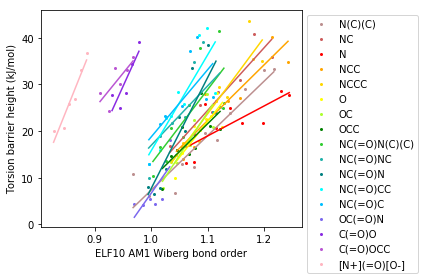

In [4]:
for i, fgroup in enumerate(fgroups_smarts):
    energies = fgroups_td[fgroup]['energy']
    am1_wbos = fgroups_td[fgroup]['elf10_am1_wbo']
    max_energies = [max(energy) for energy in energies]
    slope, intercept, r_value, p_value, std_err = stats.linregress(am1_wbos, max_energies)
    fgroups_td[fgroup]['stats'] = [slope, r_value**2, p_value, std_err]
    plt.plot(np.unique(am1_wbos), np.poly1d([slope, intercept])(np.unique(am1_wbos)), color_keys[i])
    plt.scatter(x=am1_wbos, y=max_energies, color=color_keys[i], label=fgroups_smarts[fgroup], s=4)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('ELF10 AM1 Wiberg bond order')
plt.ylabel('Torsion barrier height (kJ/mol)')
plt.tight_layout()
plt.savefig('figures/qcarchive_torsiondrives/energy_vs_wbo.pdf')

In [5]:
# generate table
stats_table = {'functional group': [], 'slope': [], 'r^2': [], 'P value': [], 'standard error': []}
for fgroup in fgroups_smarts:
    stats_table['functional group'].append(fgroups_smarts[fgroup])
    stats_table['slope'].append(fgroups_td[fgroup]['stats'][0])
    stats_table['r^2'].append(fgroups_td[fgroup]['stats'][1])
    stats_table['P value'].append(fgroups_td[fgroup]['stats'][2])
    stats_table['standard error'].append(fgroups_td[fgroup]['stats'][3])
latex_table = pd.DataFrame(stats_table).to_latex(index=False)
with open('figures/qcarchive_torsiondrives/stats.tex', 'w') as f:
    f.write(latex_table)